# gbm3d.m output

In [88]:
import numpy as np
import scipy.io
from skimage import measure
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [89]:
# Load the output of gbm3d.m after many iterations.
grains = scipy.io.loadmat("../esedoglu/v1_largescale/grains.txt")['grains']

In [102]:
# Notice that indices here goes from 0 to N-1
dims = (128,128,128)

def load_grain(k):
    u = -np.ones(dims)
    ind = grains[k][0]
    [x, y, z] = np.unravel_index(ind, dims, order='F')
    val = grains[k][1]
    u[x,y,z] = val
    return u

<IPython.core.display.Javascript object>


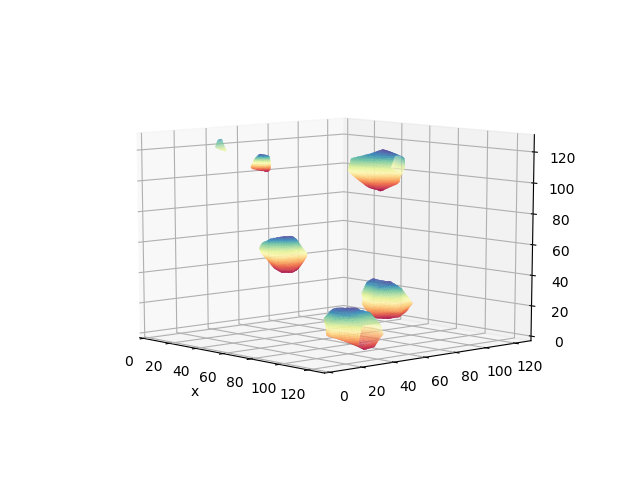

In [108]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(5):
    u = load_grain(i)
    verts, faces = measure.marching_cubes_classic(u, 0, spacing=(1, 1, 1))
    ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2],
                cmap='Spectral', lw=1)
ax.set_xlim(0,128)
ax.set_ylim(0,128)
ax.set_zlim(0,128)
ax.set_xlabel("x")
plt.show()